Team Lead: Derek Molina; Members: Caden Koster, Elias Sandoval, Brian Santillan

# Overview

The data that we are analyzing in this project focuses on characteristics of hurricanes, mainly throughout the Atlantic ocean. Throughout this analysis, we will be observing the relationships between variables such as wind speed (mph) and pressure (hPa), damage (USD) and death (count), category and damage (USD), and wind speed (mph) and damage (USD) resulting from hurricanes. This data was obtained from kaggle.com.

# Hypotheses

--------------------------------------------------------
Wind Speed (mph) and Pressure (hPa)

H<sub>0 = Relationship is present
    
H<sub>a ~=~ Relationship is present
    
--------------------------------------------------------
Damage (USD) and Death (count)
    
H<sub>0 = Relationship is present
    
H<sub>a ~=~ Relationship is present

--------------------------------------------------------

# Raw Data

In [6]:
import pandas as pd
import numpy as np
import os

# current working directory formatting
print(os.getcwd())
file_path = str(os.getcwd())
file_path = file_path.replace('\\', '/')

# loading in the data
data_raw = pd.read_csv(file_path + '/hurricane_info.csv')
pd.set_option('display.max_columns', 9)
pd.set_option('display.max_rows', 10000)

# creating DataFrame
df = pd.DataFrame(data_raw)

# show first 5 rows
data_raw.head()

C:\Users\derek\OneDrive - University of Florida\Past Semesters\Summer 2023\QMB3302\Notebooks\Week 3


,Name,Duration,Wind speed,Pressure,Areas affected,Deaths,Damage,REf,Category
0,Cuba,19-Oct-24,165msngmph (270 km/h),910 hPa (26.87 inHg),"Central America, Mexico, Cuba, Florida, The Ba...",90,NaN,[12][13],5
1,San Felipe,"September 13-14, 1928",160 mph (260 km/h),929 hPa (27.43 inHg),"Lesser Antilles, The Bahamas,United States Eas...",4000,$100 million,[14],5
2,Bahamas,"September 5-6, 1932",160 mph (260 km/h),921 hPa (27.20 inHg),"The Bahamas, Northeastern United States",16,NaN,[15],5
3,Camaguey,"November 5-8, 1932",175 mph (280 km/h),915 hPa (27.02 inHg),"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",3103,$40 million,[16],5
4,Brownsville,30-Aug-33,160 mph (260 km/h),930 hPa (27.46 inHg),"The Bahamas, Cuba, Florida, Texas, Tamaulipas",179,$$27.9 million,[17],5


[Text(0.5, 1.0, 'Missing Values'), Text(0.5, 23.52222222222222, 'Column'), Text(50.722222222222214, 0.5, 'Row')]


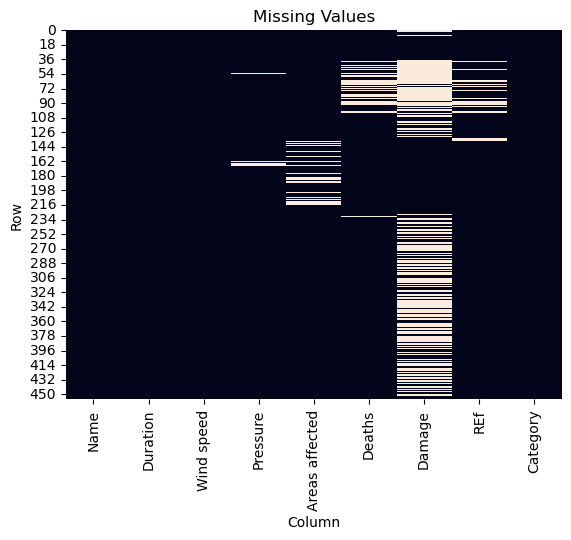

In [7]:
# data visualization library
import seaborn as sns

# shows missing (null) values
print(sns.heatmap(data_raw.isnull(), cbar = False).set(title = 'Missing Values', xlabel = 'Column', ylabel = 'Row'))

In [8]:
data_raw.head(0)

,Name,Duration,Wind speed,Pressure,Areas affected,Deaths,Damage,REf,Category


In [9]:
# removing columns
data_raw = data_raw[data_raw.columns.drop('REf')]

# make columns appropriate
data_raw.columns = ['Name', 'Duration', 'Wind Speed (mph)', 'Pressure (hPa)', 'Areas Affected', 'Deaths', 'Damages (USD)', 'Category']
data_raw.head(10)

,Name,Duration,Wind Speed (mph),Pressure (hPa),Areas Affected,Deaths,Damages (USD),Category
0,Cuba,19-Oct-24,165msngmph (270 km/h),910 hPa (26.87 inHg),"Central America, Mexico, Cuba, Florida, The Ba...",90,NaN,5
1,San Felipe,"September 13-14, 1928",160 mph (260 km/h),929 hPa (27.43 inHg),"Lesser Antilles, The Bahamas,United States Eas...",4000,$100 million,5
2,Bahamas,"September 5-6, 1932",160 mph (260 km/h),921 hPa (27.20 inHg),"The Bahamas, Northeastern United States",16,NaN,5
3,Camaguey,"November 5-8, 1932",175 mph (280 km/h),915 hPa (27.02 inHg),"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",3103,$40 million,5
4,Brownsville,30-Aug-33,160 mph (260 km/h),930 hPa (27.46 inHg),"The Bahamas, Cuba, Florida, Texas, Tamaulipas",179,$$27.9 million,5
5,Tampico,21-Sep-33,160 mph (260 km/h),929 hPa (27.43 inHg),"Jamaica, Yucatin Peninsula",184,$5 million,5
6,Labor Day,3-Sep-35,185 mph (295 km/h),892 hPa (26.34 inHg),"The Bahamas, Florida, Georgia, The Carolinas, ...",408,NaN,5
7,New England,"September 19-20, 1938",160 mph (260 km/h),940 hPa (27.76 inHg),"Eastern United States, Southwestern Quebec",682,$306 million,5
8,Carol,3-Sep-53,160 mph (260 km/h),929 hPa (27.43 inHg),"Bermuda, New England, Atlantic Canada",5,$2 million,5
9,Janet,"September 27-28, 1955",175 mph (280 km/h),914 hPa (26.99 inHg),"Lesser Antilles, Central America",1023,$65.8 million,5


In [10]:
# reformatting 'Wind Speed (mph)' column

# drops rows with any missing values
data_raw['Wind Speed (mph)'].dropna(how='any')

# create formatted list to replace "Wind Speed (mph)' column
wind_speed = []
for i in data_raw['Wind Speed (mph)']:
    i = i[0:3]
    wind_speed.append(i)

# replace old 'Wind Speed (mph)' column
data_raw['Wind Speed (mph)'] = wind_speed

data_raw.head()

,Name,Duration,Wind Speed (mph),Pressure (hPa),Areas Affected,Deaths,Damages (USD),Category
0,Cuba,19-Oct-24,165,910 hPa (26.87 inHg),"Central America, Mexico, Cuba, Florida, The Ba...",90,NaN,5
1,San Felipe,"September 13-14, 1928",160,929 hPa (27.43 inHg),"Lesser Antilles, The Bahamas,United States Eas...",4000,$100 million,5
2,Bahamas,"September 5-6, 1932",160,921 hPa (27.20 inHg),"The Bahamas, Northeastern United States",16,NaN,5
3,Camaguey,"November 5-8, 1932",175,915 hPa (27.02 inHg),"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",3103,$40 million,5
4,Brownsville,30-Aug-33,160,930 hPa (27.46 inHg),"The Bahamas, Cuba, Florida, Texas, Tamaulipas",179,$$27.9 million,5


In [11]:
# zoom in on one column
data_raw[['Wind Speed (mph)']].head()

,Wind Speed (mph)
0,165
1,160
2,160
3,175
4,160


In [12]:
# show datatypes, necessary for data cleaning; notice 'Pressure (hPa)'
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              457 non-null    object
 1   Duration          457 non-null    object
 2   Wind Speed (mph)  457 non-null    object
 3   Pressure (hPa)    452 non-null    object
 4   Areas Affected    434 non-null    object
 5   Deaths            423 non-null    object
 6   Damages (USD)     249 non-null    object
 7   Category          457 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 28.7+ KB


In [13]:
# change 'Pressure (hPa)' datatype to an integer
data_raw['Wind Speed (mph)'] = data_raw['Wind Speed (mph)'].astype(int)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              457 non-null    object
 1   Duration          457 non-null    object
 2   Wind Speed (mph)  457 non-null    int32 
 3   Pressure (hPa)    452 non-null    object
 4   Areas Affected    434 non-null    object
 5   Deaths            423 non-null    object
 6   Damages (USD)     249 non-null    object
 7   Category          457 non-null    int64 
dtypes: int32(1), int64(1), object(6)
memory usage: 26.9+ KB


# Clean Data

In [14]:
# cleaned data set from Kaggle; using this for analysis
file_path = str(os.getcwd())
file_path = file_path.replace('\\', '/')

data = pd.read_csv(file_path + '/hurricane_clean_dataset.csv')
pd.set_option('display.max_columns', 9)
pd.set_option('display.max_rows', 10000)

df = pd.DataFrame(data)
# make columns appropriate
data.columns = ['Name', 'Areas Affected', 'Month', 'Day', 'Year', 'Wind Speed (mph)', 'Pressure (hPa)', 'Damages (USD)', 'Deaths']
data.head()

,Name,Areas Affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages (USD),Deaths
0,San Felipe,"Lesser Antilles, The Bahamas,United States Eas...",September,13,1928,160,929,100000000.0,4000
1,Camaguey,"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",November,5,1932,175,915,40000000.0,3103
2,New England,"Eastern United States, Southwestern Quebec",September,19,1938,160,940,306000000.0,682
3,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,65800000.0,1023
4,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000.0,756


In [15]:
# ensure columns are clean; notice row 15 in the 'Pressure (hPa)' column in the .csv file
data['Pressure (hPa)'] = data['Pressure (hPa)'].str.replace(',', '')

In [16]:
# run summary stats
data.describe()

,Day,Year,Wind Speed (mph),Damages (USD),Deaths
count,102.000000,102.000000,102.000000,1.020000e+02,102.000000
mean,15.323529,1980.460784,105.686275,3.823559e+09,495.147059
std,9.146943,22.293573,36.110661,1.673736e+10,2146.729764
min,1.000000,1928.000000,75.000000,8.000000e+00,0.000000
25%,7.000000,1961.000000,80.000000,2.125000e+06,1.250000
50%,14.000000,1984.500000,90.000000,2.750000e+07,9.000000
75%,23.750000,2000.750000,110.000000,2.867500e+08,82.500000
max,31.000000,2021.000000,190.000000,1.250000e+11,19325.000000


In [17]:
# change datatype from object (str) to int for manipulation 
data['Pressure (hPa)'] = data['Pressure (hPa)'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              102 non-null    object 
 1   Areas Affected    102 non-null    object 
 2   Month             102 non-null    object 
 3   Day               102 non-null    int64  
 4   Year              102 non-null    int64  
 5   Wind Speed (mph)  102 non-null    int64  
 6   Pressure (hPa)    102 non-null    int32  
 7   Damages (USD)     102 non-null    float64
 8   Deaths            102 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 6.9+ KB


# Hypothesis 1 - Relationship between wind speed (mph) and pressure (hPa)

In [18]:
# focus on multiple columns; is there a relationship between the first 2?
relationship_1 = data[['Wind Speed (mph)', 'Pressure (hPa)', 'Year']] # can also use .loc
relationship_1.head()

,Wind Speed (mph),Pressure (hPa),Year
0,160,929,1928
1,175,915,1932
2,160,940,1938
3,175,914,1955
4,165,927,1966


In [19]:
# find correlation coefficient to show relationship using .corr() function
correlation_coefficient_1 = data['Wind Speed (mph)'].corr(data['Pressure (hPa)'])
print(f'The correlation coefficient is: {correlation_coefficient_1}')

The correlation coefficient is: -0.9582372688681314


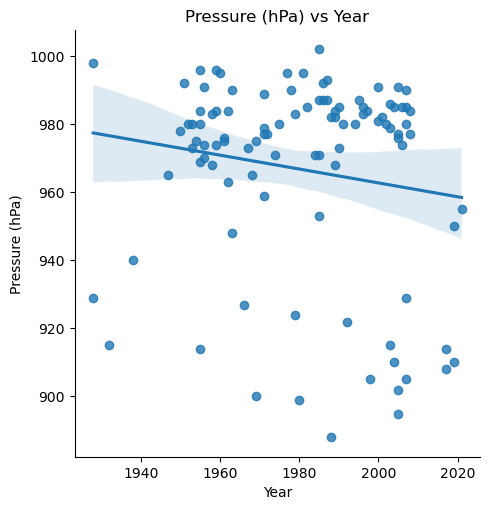

In [20]:
# scatterplot with line of best fit for 'Pressure (hPa)' as time increases
sns.lmplot(data=relationship_1, x = 'Year', y = 'Pressure (hPa)').set(title = 'Pressure (hPa) vs Year')

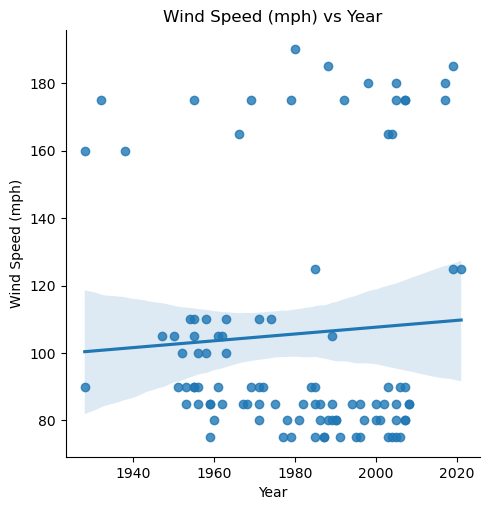

In [21]:
# scatterplot with line of best fit for 'Wind Speed (mph)' as time increases 
sns.lmplot(data=relationship_1, x = 'Year', y = 'Wind Speed (mph)').set(title = 'Wind Speed (mph) vs Year')

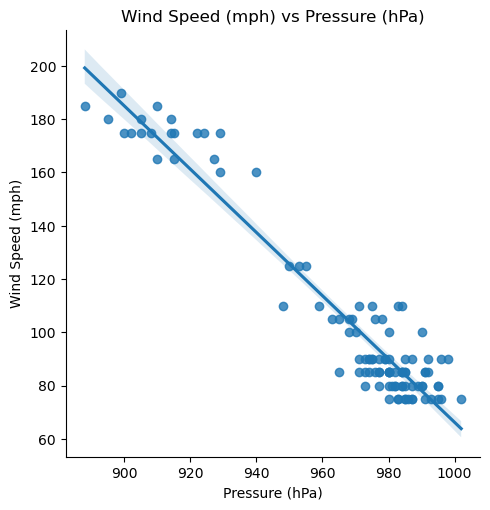

In [22]:
# scatterplot with line of best fit for relating the 2 variables; notice a strong inverse relationship
sns.lmplot(data=relationship_1, x = 'Pressure (hPa)', y = 'Wind Speed (mph)').set(ylabel = 'Wind Speed (mph)', title = 'Wind Speed (mph) vs Pressure (hPa)')

Therefore, according to the correlation coefficient of -0.9582372688681314 and the visualizations, there is an apparent inverse relationship between wind speed and pressure. Therefore, the null hypothesis is true.

We can also focus on specific regions. Since there are 100 entries in the dataset, a sample of 30 should be representative of the population.

In [23]:
# sampling data from the DataFrame
random_list = [np.random.randint(100) for i in range(0,30)]

# index values that we will use to select variables at random
print(random_list)

[52, 82, 39, 2, 63, 97, 45, 13, 97, 99, 76, 67, 67, 43, 94, 96, 23, 97, 2, 39, 14, 75, 9, 2, 22, 14, 51, 62, 28, 24]


In [24]:
# create new lists for new DataFrame by using index list created above to find random values
random_wind_speed = [data.loc[random_list[i], 'Wind Speed (mph)'] for i in range(30)]
random_pressure = [data.loc[random_list[i], 'Pressure (hPa)'] for i in range(30)]

# initialize DataFrame
randomized_dataframe = pd.DataFrame()

# create columns
randomized_dataframe['rand_wind_speed_mph'] = random_wind_speed
randomized_dataframe['rand_pressure_hPa'] = random_pressure
randomized_dataframe.head()

,rand_wind_speed_mph,rand_pressure_hPa
0,85,984
1,85,985
2,90,998
3,160,940
4,75,983


In [25]:
# confirms inverse relationship is present; not exactly necessary since correlation was plotted
correlation_coefficient_rand_1 = randomized_dataframe['rand_wind_speed_mph'].corr(randomized_dataframe['rand_pressure_hPa'])
print(f'The correlation coefficient is: {correlation_coefficient_rand_1}')

The correlation coefficient is: -0.946352819567618


This is again, a strong inverse correlation between wind speed and pressure (hPa) in randomly selected regions

# Hypothesis 2 - Relationship between damage (USD) and death count

In [56]:
# zoom in on relevant columns
relationship_2 = data[['Damages (USD)', 'Deaths', 'Year']]
relationship_2.head()

,Damages (USD),Deaths,Year
0,100000000.0,4000,1928
1,40000000.0,3103,1932
2,306000000.0,682,1938
3,65800000.0,1023,1955
4,229000000.0,756,1966


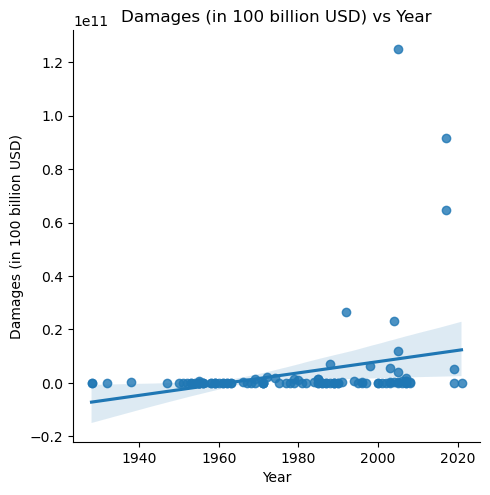

In [57]:
# scatterplot with line of best fit to find 'Damages (USD)' points as time increases
sns.lmplot(data=relationship_2, x = 'Year', y = 'Damages (USD)').set(ylabel = 'Damages (in 100 billion USD)', title = 'Damages (in 100 billion USD) vs Year')

Outlier Filtering:

In [58]:
# filter for damages that exceed 60 billion USD to find outliers; can be visualized above
data.loc[data['Damages (USD)'] > 60000000000]

,Name,Areas Affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages (USD),Deaths
13,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836
17,Irma,"Cape Verde, The Caribbean, Virgin Islands, Cub...",September,5,2017,180,914,6.480000e+10,138
18,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908,9.160000e+10,3057


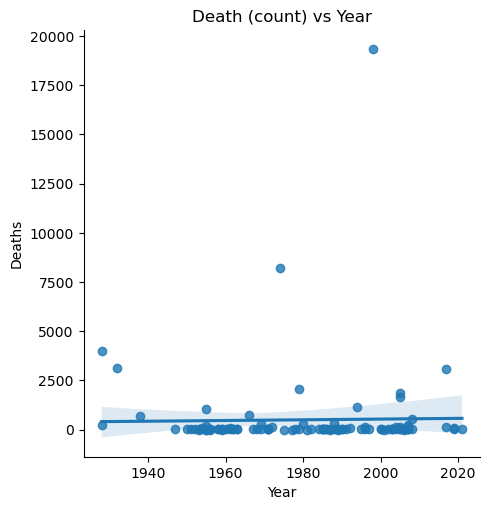

In [59]:
# scatterplot with line of best fit to find 'Deaths' points as time increases
sns.lmplot(data=relationship_2, x = 'Year', y = 'Deaths').set(title='Death (count) vs Year')

Outlier Filtering

In [60]:
# filter data to find deaths exceeding 7500; outliers can be visualized above
data.loc[data.Deaths > 7500]

,Name,Areas Affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages (USD),Deaths
10,Mitch,"Central America, Yucatin Peninsula, South Florida",October,26,1998,180,905,6.200000e+09,19325
37,Fifi,"Hispaniola, Jamaica, Mexico, Central America",September,14,1974,110,971,1.800000e+09,8210


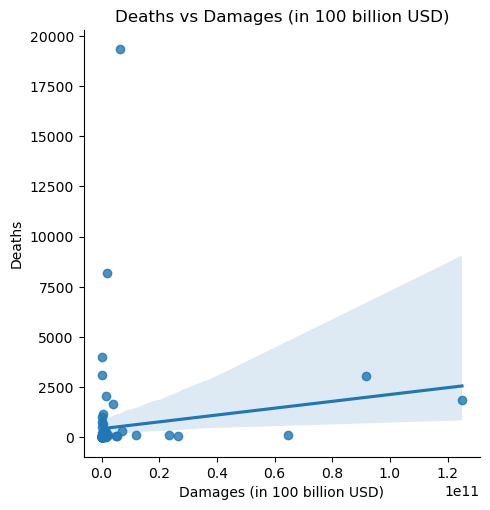

In [61]:
# scatterplot with line of best fit to find relationship between 'Deaths' and 'Damages (USD)'
sns.lmplot(data=relationship_2, x = 'Damages (USD)', y = 'Deaths').set(title='Deaths vs Damages (in 100 billion USD)', xlabel='Damages (in 100 billion USD)')

In [62]:
# find correlation coefficient between the 2 variables
correlation_coefficient_2 = relationship_2['Damages (USD)'].corr(relationship_2['Deaths'])
print(f'The correlation coefficient is: {correlation_coefficient_2}')

The correlation coefficient is: 0.1328289039830861


In [73]:
data.loc[data.Deaths > 7500]

,Name,Areas Affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages (USD),Deaths
10,Mitch,"Central America, Yucatin Peninsula, South Florida",October,26,1998,180,905,6.200000e+09,19325
37,Fifi,"Hispaniola, Jamaica, Mexico, Central America",September,14,1974,110,971,1.800000e+09,8210


In [72]:
data.loc[data['Damages (USD)'] > 60000000000]

,Name,Areas Affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages (USD),Deaths
13,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836
17,Irma,"Cape Verde, The Caribbean, Virgin Islands, Cub...",September,5,2017,180,914,6.480000e+10,138
18,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908,9.160000e+10,3057


While this may seem intuitive, there appears to be a low correlation between damages in dollars and death count. Some limitations to consider, however, may be that there was less capital intensive infastructure components before the year 2000, less accurate record keeping, a smaller/more dispersed population, and more sophisticated evacuation/safety procedures in place for regions that experience high . Still, according to the data, there seems to be some correlation, but very low.

In [28]:
# focus on data after the year 2000 after considering data limitations
modern_data = relationship_2.loc[relationship_2.Year > 2000]
modern_data.head()

,Damages (USD),Deaths,Year
11,5.370000e+09,51,2003
12,2.330000e+10,124,2004
13,1.250000e+11,1836,2005
14,1.200000e+10,125,2005
15,1.760000e+09,45,2007


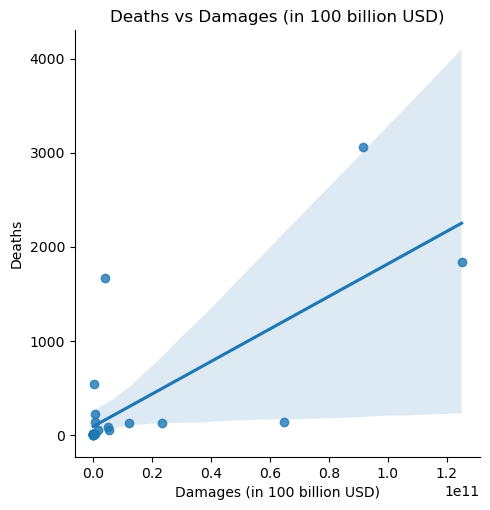

In [29]:
# new scatterplot relating the 2 variables
sns.lmplot(data=modern_data, x = 'Damages (USD)', y = 'Deaths').set(title='Deaths vs Damages (in 100 billion USD)', xlabel='Damages (in 100 billion USD)')

In [30]:
# new correlation coefficient is slightly stronger, but data limitations are still present
correlation_coefficient_2_modern = modern_data['Damages (USD)'].corr(modern_data['Deaths'])
print(f'The correlation coefficient is: {correlation_coefficient_2_modern}')

The correlation coefficient is: 0.7416306196489809


Here, we have a much stronger positive correlation coefficient. This may be because qualitative factors such as better record keeping, higher populations, and more hurricane prone infastructure in the modern era. However, the data is still sparse and some points are pulling the tredline up and down.

# Trends in the Data

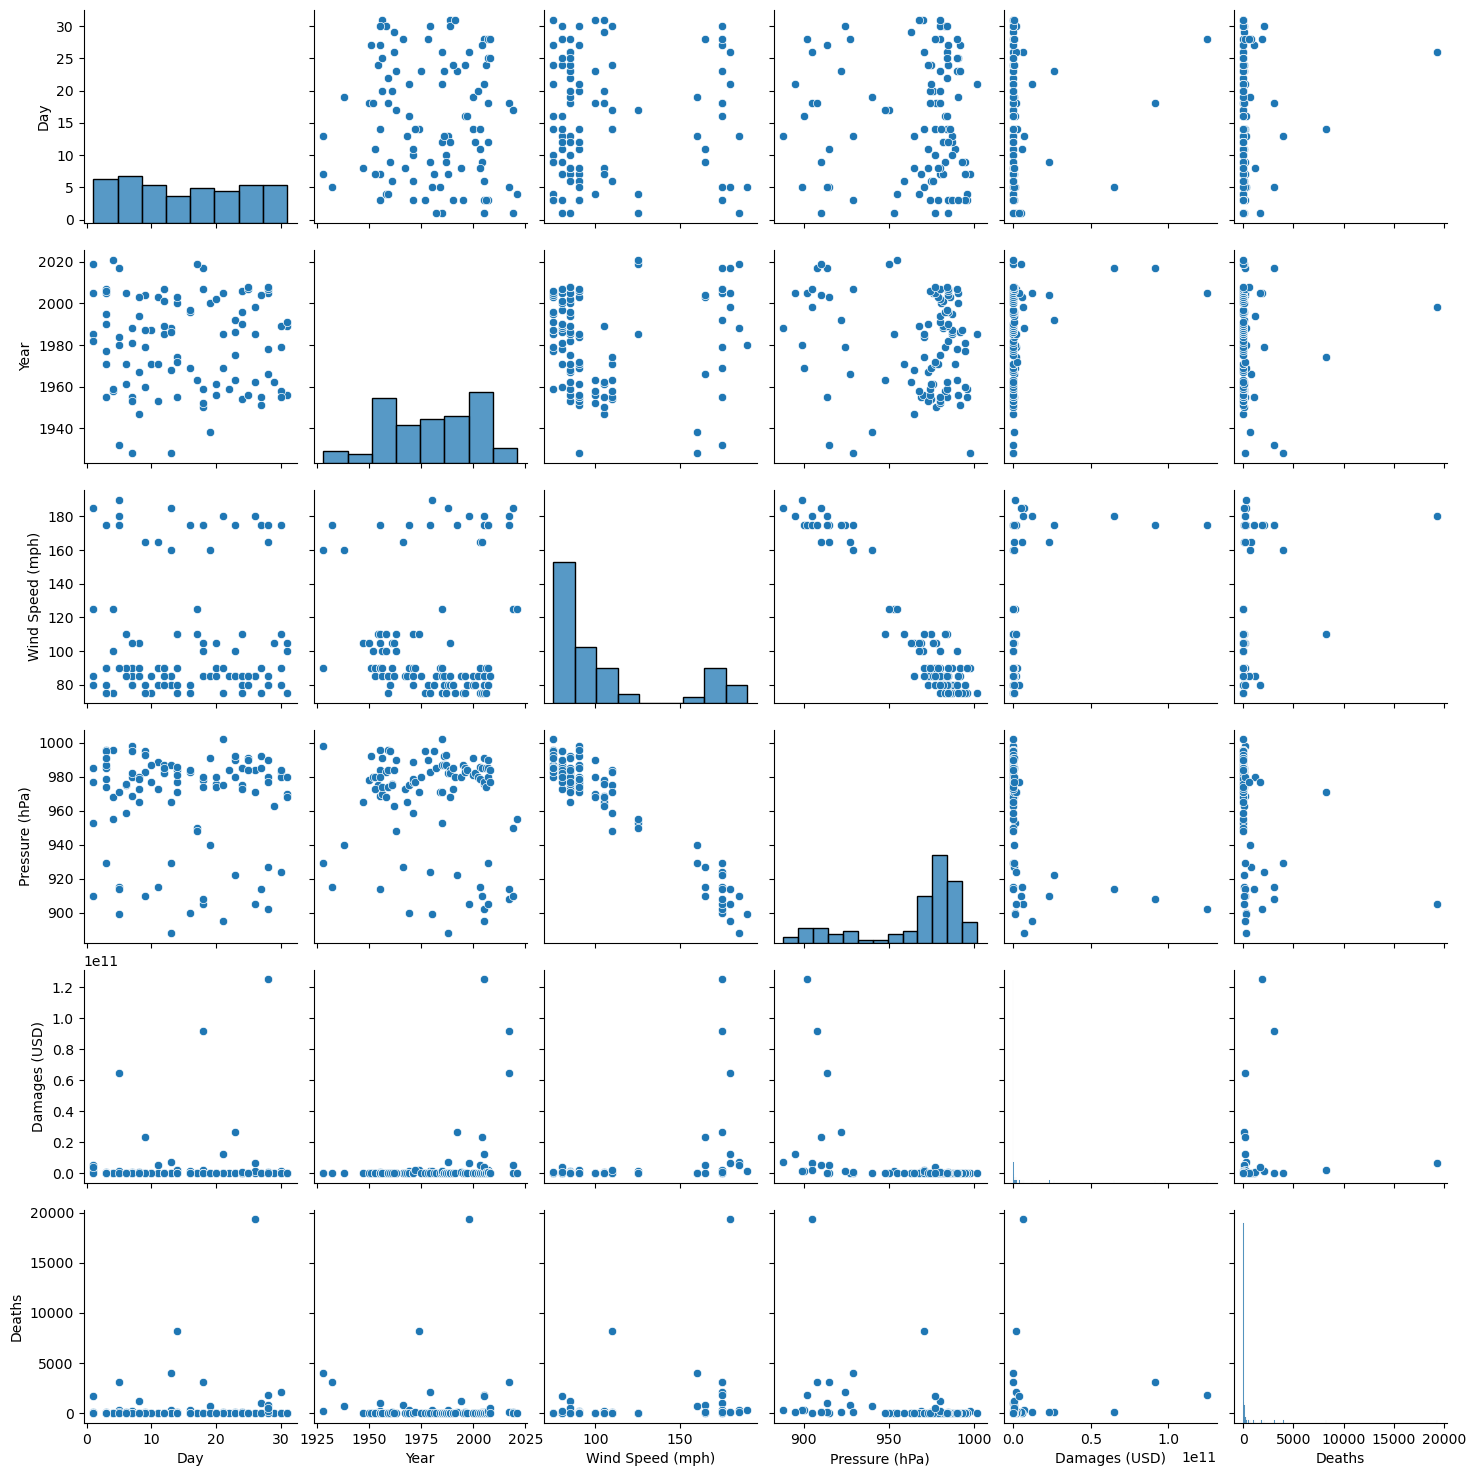

In [31]:
# visualize several relationships between variables; note that irrelevant information such as 'Year' vs 'Day' should be avoided
sns.pairplot(data)

# Conclusion

There are several limitations to this data that must be kept in mind, however, after performing some tests to prove a relationship between variables, it is plausible to say there is some evidence that the variables Wind Speed (mph) and Pressure (hPa) are inversely correlated. Therefore, we fail to reject the null hypothesis for Hypothesis 1.

Conversely, our correlation for the data focused on Hypothesis 2 shows that there is a weak correlation. After zooming in on data after 2000 due to concerns of data integrity/record-keeping, we found a stronger correlation, although the data was still strangely distributed. Due to the data being irregularly distributed, our results would be inconclusive as more statistical procedures would have to be performed to ascertain if a relationship is present.